In [9]:
import pandas as pd

# Load the custom CSV file
data = pd.read_csv(r'C:\Users\97433\MachineLearningLab\Lab_three\Dataset_LogisticRegression.csv')  # Replace 'your_file.csv' with the actual file name

# Separate features (X) and target (y)
X = data.drop(columns=['Outcome'])  # Drop the target column
y = data['Outcome']                 # Select the target column


In [10]:
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression with default parameters
log_reg = LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)


c:\Users\97433\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42)

In [12]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
}

# Grid search
grid_search = GridSearchCV(LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


c:\Users\97433\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\97433\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\97433\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\97433\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_clas

Best Hyperparameters: {'C': 0.01, 'solver': 'lbfgs'}


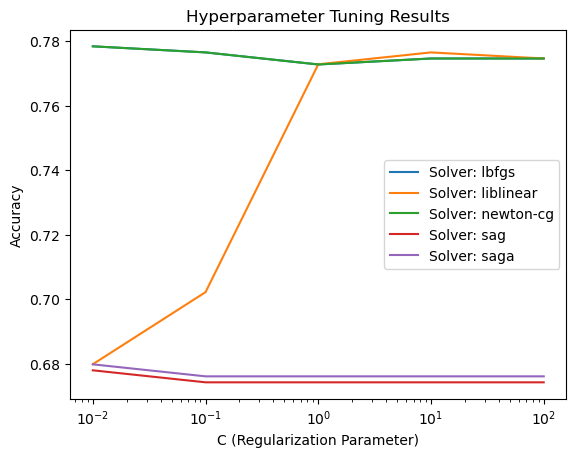

In [13]:
import matplotlib.pyplot as plt

# Results from GridSearchCV
results = grid_search.cv_results_

# Plot C values vs. mean test score for each solver
for solver in param_grid['solver']:
    mean_test_scores = [
        results['mean_test_score'][i]
        for i in range(len(results['params']))
        if results['params'][i]['solver'] == solver
    ]
    plt.plot(param_grid['C'], mean_test_scores, label=f"Solver: {solver}")

plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title('Hyperparameter Tuning Results')
plt.legend()
plt.xscale('log')
plt.show()


In [14]:
from sklearn.model_selection import cross_val_score

# Train model with best hyperparameters
final_model = LogisticRegression(
    multi_class='ovr', max_iter=1000, random_state=42, **best_params
)
cv_scores = cross_val_score(final_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy:", cv_scores.mean())


Cross-validation accuracy: 0.7783489096573207


c:\Users\97433\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\97433\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\97433\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\97433\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_clas

c:\Users\97433\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Test set accuracy: 0.7229437229437229


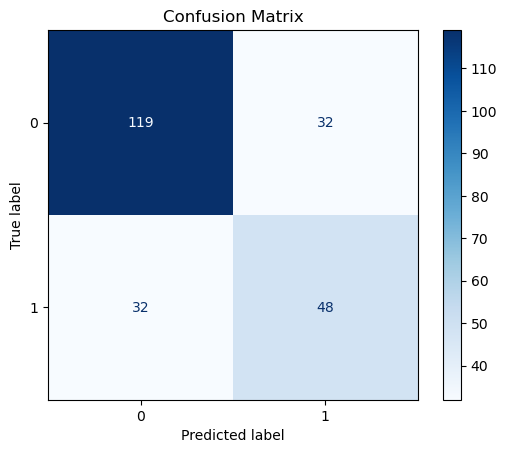

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Train the model with best hyperparameters
final_model.fit(X_train, y_train)

# Predict on the test set
y_pred = final_model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", test_accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
